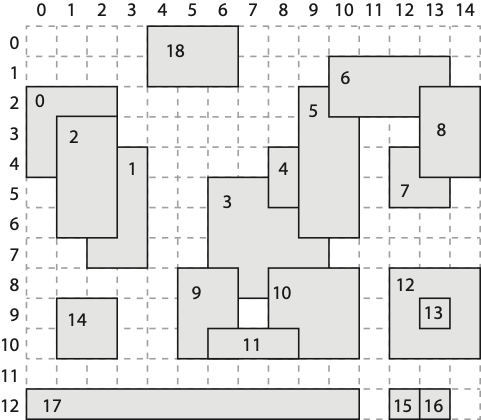

Ob koseškem bajerju gre kolesarska steza čez dotrajan most, ki ga Oddelek za motorni promet in gospodarske dejavnosti MOL krpa z lesenimi ploščami. Seznami plošč so podani kot terke `(x0, y0, x1, y1)`, ki predstavljajo koordinate nasprotnih oglišč (`x0 < x1`, `y0 < y1`). Vrstni red elementov je enak vrstnemu redu, v katerem so dodajali plošče. Plošča pokriva točke od `x0`, `y0` do `x1`, `y1`, vendar brez `x1` in `y1`. Pravokotnik, ki sega od 3 do 5, je tako dolg 2, ne 3. Plošče se lahko prekrivajo.

Številke plošč na sliki na desni so enake indeksom v seznamu. Plošče z višjimi številkami so bile na most dodane kasneje kot plošče z nižjimi.

V testih je že podana funkcija `presek(plosce, i, j)`, ki vrne `True`, če se `i`-ta in `j`-ta plošča (vsaj delno) prekrivata.

In [1]:
plosce = [(0, 2, 3, 5), (2, 4, 4, 8), (1, 3, 3, 7),
          (6, 5, 10, 9), (8, 4, 10, 6), (9, 2, 11, 7), (10, 1, 14, 3), (12, 4, 14, 6), (13, 2, 15, 5),
          (5, 8, 7, 11), (8, 8, 11, 11), (6, 10, 9, 11),
          (12, 8, 15, 11), (13, 9, 14, 10),
          (1, 9, 3, 11),
          (12, 12, 13, 13), (13, 12, 14, 13),
          (0, 12, 11, 13),
          (4, 0, 7, 2)] 

## 1. Pokritost

Napiši funkcijo `pokritost(plosce)`, ki prejme seznam plošč in vrne par (terko) ploščino pokritega dela mostu in koordinato, nad katero je največ plošč. Če je takšnih koordinat več, vrne poljubno izmed njih.

Za primer na sliki mora vrniti (93, (2, 4)), saj plošče pokrivajo 103 kvadratkov, največkrat (trikrat) pa je pokrita točka (2, 4).

### Rešitev

V bistvu gre za nalogo iz zank ter množic ali slovarjev. Vendar začnimo z dvema napačnima rešitvama.

Tole izračuna skupno ploščino, ne pokritost. Ploščina bi bila enaka pokritosti, če se plošče ne bi prekrivale.

In [2]:
pokritost = 0
for x0, y0, x1, y1 in plosce:
    pokritost += (x1 - x0) * (y1 - y0)
print(pokritost)

124


To sem videl pri enem, dveh študentih - in sem jima dal par točk. Tole pa je manj ugledno:

In [3]:
pokritost = 0
for x0, y0, x1, y1 in plosce:
    while y0 < y1:
        while x0 < x1:
            # tule počnemo karsižebodi - recimo seštevamo, dajemo v kako množico...
            ...
            x0 += 1
        y0 += 1

Notranja zanka ne počne tega, kar bi upali. Konkretno: notranja zanka se izvede le prvič, pri prvem `y`. Ko se zunanja zanka izvaja drugič, je `x0` že enak `x1` (saj je do tam priplezal v prvem krogu in nihče ga ni nastavil nazaj na njegovo prvotno vrednost!). Skratka, tole se zapelje po prvi vrstici plošče, ostale pa preskoči.

Če bi naloga zahtavala le število pokritih kvadratkov, bi jo lahko rešili tako:

In [4]:
pokriti = set()
for x0, y0, x1, y1 in plosce:
    for x in range(x0, x1):
        for y in range(y0, y1):
            pokriti.add((x, y))
            
print(len(pokriti))

103


Ker je `pokriti` množica, ni nič hudega, če isti kvadratek dodamo večkrat - v množici bo le enkrat.

Vendar naloga zahteva, da povemo tudi, kateri kvadratek je pokrit največkrat. Zato ni dovolj, da vemo, kateri so pokriti, temveč moramo šteti tudi, kolikokrat. To pa je naloga za slovar: ključi bodo koordinate, vrednosti slovarja pa števci.

In [5]:
pokriti = {}
for x0, y0, x1, y1 in plosce:
    for x in range(x0, x1):
        for y in range(y0, y1):
            if (x, y) not in pokriti:
                pokriti[(x, y)] = 0
            pokriti[(x, y)] += 1

Lahko pa se spomnimo slovarjev s privzetimi vrednostmi, pa bo še preprosteje.

In [6]:
from collections import defaultdict

pokriti = defaultdict(int)
for x0, y0, x1, y1 in plosce:
    for x in range(x0, x1):
        for y in range(y0, y1):
            pokriti[(x, y)] += 1

Število elementov je spet enako številu pokritih kvadratkov.

In [7]:
len(pokriti)

103

Koordinate največkrat pokritega pa so enake ključu z največjo vrednostjo.

In [8]:
naj_koord = None
naj_pokrit = 0
for koord, pokrit in pokriti.items():
    if pokrit > naj_pokrit:
        naj_koord = koord
        naj_pokrit = pokrit
        
print(naj_koord)

(2, 4)


Mimogrede smo - če se prav spomnim - omenili tudi bližnjico. `max` sprejme dodatni argument `key`, ki mora biti funkcija. Če ga podamo, `max` ne vrne elementa z največjo vrednostjo temveč element, pri katerem ta funkcija vrne največjo vrednost.

In [9]:
max(pokriti, key=pokriti.get)

(2, 4)

Tole vrne tisti ključ v `pokriti`, za katerega `pokriti.get` vrne največjo vrednost...

Rešitev naloge je tako

In [10]:
def pokritost(plosce):
    pokriti = defaultdict(int)
    for x0, y0, x1, y1 in plosce:
        for x in range(x0, x1):
            for y in range(y0, y1):
                pokriti[(x, y)] += 1
    return len(pokriti), max(pokriti, key=pokriti.get)

## 2. Inventar

Ker so plošče menda primer dobre prakse, jim bo MOL opremil z inventarnimi številkami. Predtem je potrebno narediti popis, zato napiši funkcijo `inventar(plosce, ime_dat)`, ki v datoteko s podanim imenom shrani dimenzije in število kosov plošč posamezne oblike. Datoteka mora biti oblikovana natančno tako, kot kaže datoteka plosce.txt v testih.
Dimenzije uredi tako, da bo prva vedno manjša. Plošči dimenzij, na primer, 2x3 in 3x2 sta enaki, zato obe upoštevaj, kot da sta veliki 2x3.

### Rešitev

Tole je očitno naloga iz datotek, oblikovanja nizov in slovarjev. V datoteko le pišemo preproste nize, pa tudi oblikovanje ne bi smelo biti nič težkega. Slovarje pa potrebujemo, tako kot prej, za štetje.

In [11]:
def inventar(plosce, ime_datoteke):
    spisek = defaultdict(int)
    for x0, y0, x1, y1 in plosce:
        w = x1 - x0
        h = y1 - y0
        if w > h:
            w, h = h, w
        spisek[(w, h)] += 1

    f = open(ime_datoteke, "w")
    for (w, h), st in sorted(spisek.items()):
        f.write(f"{w:3}x{h:3}: {st:2} kosov\n")

Tako kot prej bomo uporabili `defaultdict`; če se ne bi spomnili nanj, bi nam - z dvema vrsticama kode več - čisto dobro služil tudi običajni slovar.

Vsako ploščo pomerimo. Če je širša kot daljša, zamenjamo širino in višino. Dimenzije plošč so ključi, vrednosti so, spet, števci.

Potem gremo čez slovar in zapisujemo vse skupaj v datoteko.

Nekateri so pisali krajše, drugi daljše rešitve. Pokažimo oboje.

Daljšo rešitev dobimo, če se ne spomnimo na `defaultdict` in če ne menjamo spremenljivk.

In [12]:
def inventar(plosce, ime_datoteke):
    spisek = {}
    for x0, y0, x1, y1 in plosce:
        w = x1 - x0
        h = y1 - y0
        if w > h:
            if (h, w) not in spisek:
                spisek[(h, w)] = 0
            spisek[(h, w)] += 1
        else:
            if (w, h) not in spisek:
                spisek[(w, h)] = 0
            spisek[(w, h)] += 1

    f = open(ime_datoteke, "w")
    for (w, h), st in sorted(spisek.items()):
        f.write(f"{w:3}x{h:3}: {st:2} kosov\n")

Kar nerodno, ni pa tako grozno.

Krajšo dobimo, če poznamo `Counter`. In si mu upamo podtakniti generator. In njegov rezultat zmašiti v niz. Ki ga kar tako zapišemo v datoteko. Ki jo odpremo čisto mimogrede.

In [13]:
def inventar(plosce, ime_datoteke):
    open(ime_datoteke, "w").write(
        "\n".join(f"{w:3}x{h:3}: {st:2} kosov"
                  for (w, h), st in sorted(Counter((min(x1 - x0, y1 - y0), max(x1 - x0, y1 - y0))
                                           for x0, y0, x1, y1 in plosce).items())))

## 3. Stiki

Napiši funkcijo `neposredno_na(plosce, i)`, ki vrne množico indeksov plošč, ki se nahajajo neposredno nad i-to. 

Klic `neposredno_na(plosce, 3)` vrne `{4, 9, 10}`. Plošča 5 ni neposredno nad 3, ker je vmes 4. Klic `neposredno_na(plosce, 9)` vrne `{11}`; plošča 3 ni nad 9, ker je pod njo.

### Rešitev

Tole je le naloga iz zank in pogojev. Ampak taka, zavozlana.

Najprej jo rešimo tako, kot bi jo rešili programerji v "starih" jezikih.

In [14]:
def neposredno_na(plosce, i):
    nad = set()
    for j in range(i + 1, len(plosce)):
        je_nad = presek(plosce, i, j)
        for k in nad:
            if presek(plosce, k, j):
                je_nad = False
        if je_nad:
            nad.add(j)
    return nad

Za vsako ploščo od `i + 1`-ve naprej (nad i-to ploščo so lahko namreč le te, ki imajo indeks večji od `i`) preverimo, ali se seka z `i`-to. `je_nad` bo `True`, če se, in `False`, če se ne. Potem gremo čez vse plošče, za katere že vemo, da so nad `i`-to. Če se sekajo z `j`-to, potem so očitno med `i`-to in `j`-to, torej se `j`-ta ne dotika neposredno `i`-te. V tem primeru postavimo `je_nad` na `False`. Če je `je_nad` po tem še vedno `True`, dodamo `j`-to ploščo v množico tistih, ki so neposredno nad `i`-to.

Če razmislimo malo slabše, dobimo nekoliko daljšo različico:

In [15]:
def neposredno_na(plosce, i):
    nad = set()
    for j in range(i + 1, len(plosce)):
        je_nad = presek(plosce, i, j)
        for k in range(i + 1, j):
            if presek(plosce, i, k) and presek(plosce, k, j):
                je_nad = False
        if je_nad:
            nad.add(j)
    return nad

`k`-ta plošča izloči `j`-to, če se sekaj z obema, `i`-to in `j`-to. Zato preverjamo oba preseka...

Druga variacija prve rešitve je

In [16]:
def neposredno_na(plosce, i):
    nad = set()
    for j in range(i + 1, len(plosce)):
        if presek(plosce, i, j):
            je_nad = True
            for k in nad:
                if presek(plosce, k, j):
                    je_nad = False
            if je_nad:
                nad.add(j)
    return nad

Zdaj pa bolj Pythonovska. Če uporabimo `else` po `for`, se znebimo "indikatorja" `je_nad`.

In [17]:
def neposredno_na(plosce, i):
    nad = set()
    for j in range(i + 1, len(plosce)):
        if presek(plosce, i, j):
            for k in nad:
                if presek(plosce, k, j):
                    break
            else:
                nad.add(j)
    return nad

Spomnimo se: `else` po `for` se izvede, če se `for` ni prekinil z `break`. V tem programu: zanko prekinemo, če naletimo na ploščo, ki je med `i`-to in `j`-to, in v tem primeru se `else` ne izvede in `j`-ta plošča ne doda.

Bolj Pythonovska rešitev je

In [18]:
def neposredno_na(plosce, i):
    nad = set()
    for j in range(i + 1, len(plosce)):
        if presek(plosce, i, j) and not any(presek(plosce, k, j) for k in nad):
            nad.add(j)
    return nad

## 4. Nosilnost

Napiši funkcijo `nosilnost(plosce, i)`, ki vrne skupno ploščino i-te plošče in vseh plošč, ki so neposredno ali posredno nad njo. Plošča je posredno nad drugo, če je privita v katero od plošč, ki so (neposredno ali posredno) privite vanjo.

Za ploščo 0 mora funkcija vrniti 25 (3x3 + 2x4 + 2x4). Za ploščo 3 dovolim, da vaša funkcija deluje narobe in ploščo 11 šteje dvakrat, seveda pa bom cenil, če jo bo le enkrat. (Pravilna rešitev je 65, priznal pa bom tudi 65.)

### Rešitev

Tole je očitno naloga iz rekurzije.

Načelno se naloge ne navezujejo ena na drugo, a pri nalogi iz rekurzije sem presodil, da bo tisti, ki zmore to, zmogel tudi tretjo.

Preprostejša - in malo napačna - rešitev je

In [19]:
def nosilnost(plosce, i):
    if i in ze:
        return 0
    x0, y0, x1, y1 = plosce[i]
    return (x1 - x0) * (y1 - y0) + sum(nosilnost(plosce, j) for j in neposredno_na(plosce, i))

Ta rešitev bi ploščeo 11 štela dvakrat - enkrat, ker je na plošči 9 in enkrat, ker je na plošči 10. Da bi to popravili, bi morali nekako beležiti, katere plošče smo že šteli. Preprosteje pa je kar poiskati vse plošče, ki se nahajajo nad podano, in sešteti njihove ploščine. To storimo s pomožno rekurzivno funkcijo.

In [20]:
def posredno_na(plosce, i):
    na = {i}
    for j in neposredno_na(plosce, i):
        na |= posredno_na(plosce, j)
    return na


def nosilnost(plosce, i):
    ploscina = 0
    for j in posredno_na(plosce, i):
        x0, y0, x1, y1 = plosce[j]
        ploscina += (x1 - x0) * (y1 - y0)
    return ploscina

Ali, krajše

In [21]:
def posredno_na(plosce, i):
    return {i}.union(*(posredno_na(plosce, j) for j in neposredno_na(plosce, i)))

def nosilnost(plosce, i):
    return sum((x1 - x0) * (y1 - y0)
               for x0, y0, x1, y1 in (plosce[j] for j in posredno_na(plosce, i)))

Eden od študentov je nalogo rešil brez rekurzije. (Tule je malenkost poenostavljena verzija.)

In [4]:
def _ploscina(plosce, i):
    x0, y0, x1, y1 = plosce[i]
    return (x1 - x0) * (y1 - y0)


def nosilnost(plosce, i):
    vse = [i]
    for pls in vse:
        vse += neposredno_na(plosce, pls)
    return sum(_ploscina(plosce, i) for i in set(vse))

Odlično!

## 5. Slalom

Napiši razred `Most`:

- konstruktor prejme seznam plošč,
- metoda `pokrito(x, y)` pa vrne `True`, če je podana koordinata pokritа.

Napiši razred `Kolesar`:

- konstruktor dobi objekt razreda `Most` in začetne koordinate kolesarja (njegovi argumenti bodo torej `(self, most, x, y)`. )
- `premik(smer)` prejme niz `"<"`, `">"`, `"^"` ali `"v"` in premakne kolesarja za eno polje v to smer, če na ciljnem polju ni plošče. Če je tam plošča, kolesar pade; po padcu se ne premika več, torej kasnejši klici metode premik ne naredijo več ničesar. (^ pomeni, da se koordinata y zmanjša.)
- `pozicija()` vrne trenutne koordinate kolesarja.

### Rešitev

Tole je bila, očitno, naloga iz objektnega programiranja. Bistvo je bilo bolj v `Kolesar` kot v `Most`: morali ste si zamisliti, kako shranjevati njegove koordinate (kar ni raketna znanost), morali ste pomisliti, da bo potrebno vedeti, ali je še živ ali ne in morali ste klicati metodo `pokrito`, ki ste je pripravili v razredu `Most`.

In [22]:
class Most:
    def __init__(self, plosce):
        self.plosce = plosce

    def pokrito(self, x, y):
        return any(x0 <= x < x1 and y0 <= y < y1
                   for x0, y0, x1, y1 in self.plosce)

class Kolesar:
    def __init__(self, most, x, y):
        self.most = most
        self.x = x
        self.y = y
        self.ziv = True

    def premik(self, smer):
        dx, dy = {"<": (-1, 0), ">": (1, 0), "^": (0, -1), "v": (0, 1)}[smer]
        if self.ziv and not self.most.pokrito(self.x + dx, self.y + dy):
            self.x += dx
            self.y += dy
        else:
            self.ziv = False

    def pozicija(self):
        return self.x, self.y


Dva simpatična detajla - ki pa bi ju lahko seveda brez škode napisali tudi malo - sta `any` v metodi `pokrito` in, predvsem, slovarček v `premik`. Z njim se izognemo kupu `if`-ov: slovar vsaki smeri priredi spremembo v smeri x in y.

## Celotna rešitev

Celotna rešitev izpita brez kakšnih groznih trikov je takšna.

In [23]:
from collections import defaultdict


# 1

def pokritost(plosce):
    pokriti = defaultdict(int)
    for x0, y0, x1, y1 in plosce:
        for x in range(x0, x1):
            for y in range(y0, y1):
                pokriti[(x, y)] += 1
                
    naj_koord = None
    naj_pokrit = 0
    for koord, pokrit in pokriti.items():
        if pokrit > naj_pokrit:
            naj_koord = koord
            naj_pokrit = pokrit
            
    return len(pokriti), naj_koord

# 2

def inventar(plosce, ime_datoteke):
    spisek = defaultdict(int)
    for x0, y0, x1, y1 in plosce:
        w = x1 - x0
        h = y1 - y0
        if w > h:
            w, h = h, w
        spisek[(w, h)] += 1

    f = open(ime_datoteke, "w")
    for (w, h), st in sorted(spisek.items()):
        f.write(f"{w:3}x{h:3}: {st:2} kosov\n")
        
        
# 3

def neposredno_na(plosce, i):
    nad = set()
    for j in range(i + 1, len(plosce)):
        if presek(plosce, i, j) and not any(presek(plosce, k, j) for k in nad):
            nad.add(j)
    return nad


# 4

def posredno_na(plosce, i):
    na = {i}
    for j in neposredno_na(plosce, i):
        na |= posredno_na(plosce, j)
    return na


def nosilnost(plosce, i):
    ploscina = 0
    for j in posredno_na(plosce, i):
        x0, y0, x1, y1 = plosce[j]
        ploscina += (x1 - x0) * (y1 - y0)
    return ploscina


# 5

class Most:
    def __init__(self, plosce):
        self.plosce = plosce

    def pokrito(self, x, y):
        return any(x0 <= x < x1 and y0 <= y < y1
                   for x0, y0, x1, y1 in self.plosce)

class Kolesar:
    def __init__(self, most, x, y):
        self.most = most
        self.x = x
        self.y = y
        self.ziv = True

    def premik(self, smer):
        dx, dy = {"<": (-1, 0), ">": (1, 0), "^": (0, -1), "v": (0, 1)}[smer]
        if self.ziv and not self.most.pokrito(self.x + dx, self.y + dy):
            self.x += dx
            self.y += dy
        else:
            self.ziv = False

    def pozicija(self):
        return self.x, self.y